- 비지도 학습(unsupervised learning)은 타겟값이 없을 때 사용하는 머신러닝 알고리즘

---
# 데이터셋 받기

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-07-28 16:02:09--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2025-07-28 16:02:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2025-07-28 16:02:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape) # 300x100x100: 샘플개수x이미지의 높이x이미지의 넓이

(300, 100, 100)


---
# 데이터셋 살펴보기

In [4]:
print(fruits[0, 0, :])
print(len(fruits[0, 0, :]))

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]
100


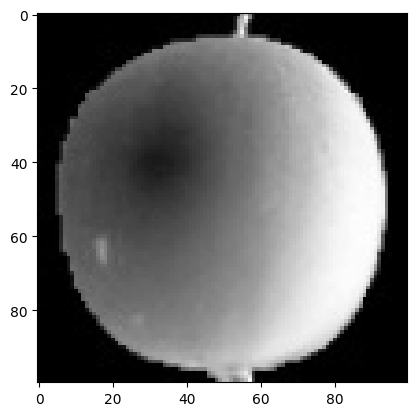

In [5]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

- 원래라면 바탕이 흰색이고 물체가 짙은 색이다.
    - 흑백 이미지에서 픽셀값은 0(검정) ~ 255(흰색)의 사이의 값을 갖는다.
    - 넘파이가 픽셀값으로 변환할 때 반전시켜서 변환했기 때문에 이렇게 나타나는것임
    - 바탕이 아니라 물체에 집중해야하기 때문에, 물체를 더 큰 픽셀값으로 나타내기 위해 이렇게 반전시키는 것.
    - 만약 이게 보기 싫으면, 플로팅할 때 아래와 같이 `cmap`옵션을 `gray_r`로 설정해주면 됨

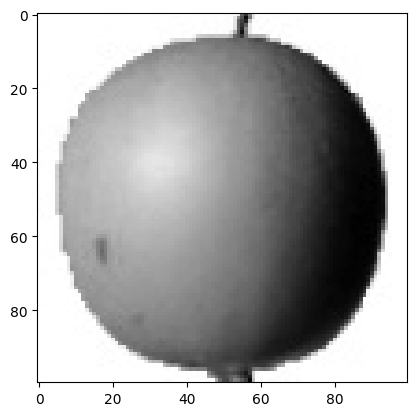

In [6]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

- 반전시킨걸 다시 반전시켰기 때문에, 바탕은 큰 픽셀값(흰색)을 갖는다.

- 다른 이미지도 살펴보자.

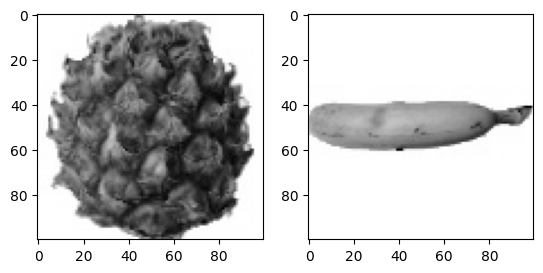

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(fruits[100], cmap='gray_r')
ax[1].imshow(fruits[200], cmap='gray_r')
plt.show()

---
# 각 이미지의 픽셀값 분석하기
- 일단 300개의 샘플은 각각 100개씩 사과, 파인애플, 바나나 이미지이다.
- 각 100x100의 shape을 갖는 샘플들을 1차원 배열로 나타내보자.
    - 1차원으로 변환시키면 이미지로 나타낼수는 없지만 배열 연산이 편리해진다.

In [9]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

#### 각 샘플의 픽셀 평균값 구해보기
- 사과의 픽셀 평균값부터 구해보자.
- `axis=1`로 설정하면 행방향으로 연산을 수행한다. 결과적으로 각 데이터 샘플마다 픽셀값 평균을 구하게 된다.
    - 만약 `axis=0`으로 설정하면 열방향으로 연산을 수행 (각 픽셀의 평균값)

In [10]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


#### 과일별 픽셀값 평균의 히스토그램 살펴보기

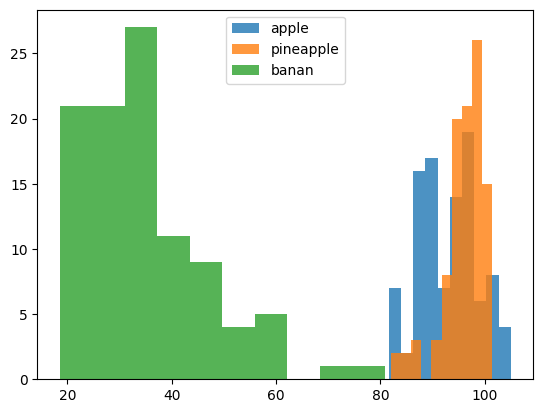

In [13]:
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banan')
plt.legend()
plt.show()

👉 바나나는 픽셀값만으로 명확하게 레이블이 분류되는 반면, 사과와 파인애플은 겹치는 부분이 커서 구분이 어려움
- `axis=0`으로 설정해서 픽셀별 평균값을 구하면 어떻게될까? 요번에는 bar plot으로 픽셀 10000개에 대한 평균값을 나타내보자.

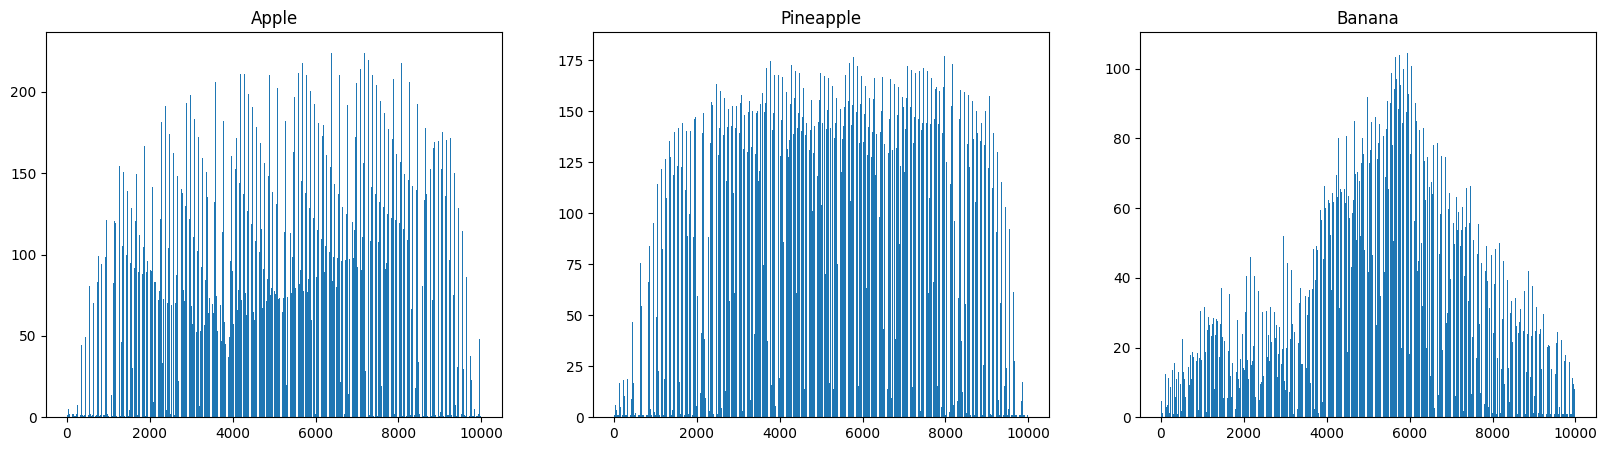

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].bar(range(10000), apple.mean(axis=0))
ax[1].bar(range(10000), pineapple.mean(axis=0))
ax[2].bar(range(10000), banana.mean(axis=0))

ax[0].set_title('Apple')
ax[1].set_title('Pineapple')
ax[2].set_title('Banana')

plt.show()

👉 여기서 구한 픽셀별 평균값을 다시 100x100의 이미지로 그리면 어떻게 그려질까?

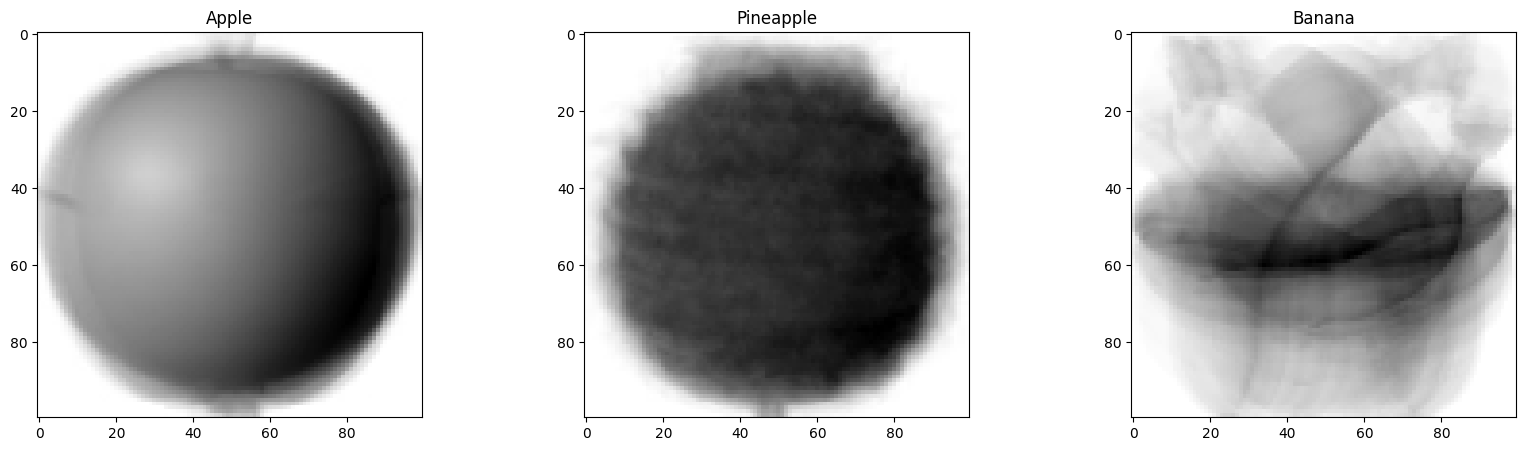

In [22]:
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(apple_mean, cmap='gray_r')
ax[1].imshow(pineapple_mean, cmap='gray_r')
ax[2].imshow(banana_mean, cmap='gray_r')

ax[0].set_title('Apple')
ax[1].set_title('Pineapple')
ax[2].set_title('Banana')

plt.show()

---
# 평균값과 가까운 샘플 고르기

In [25]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


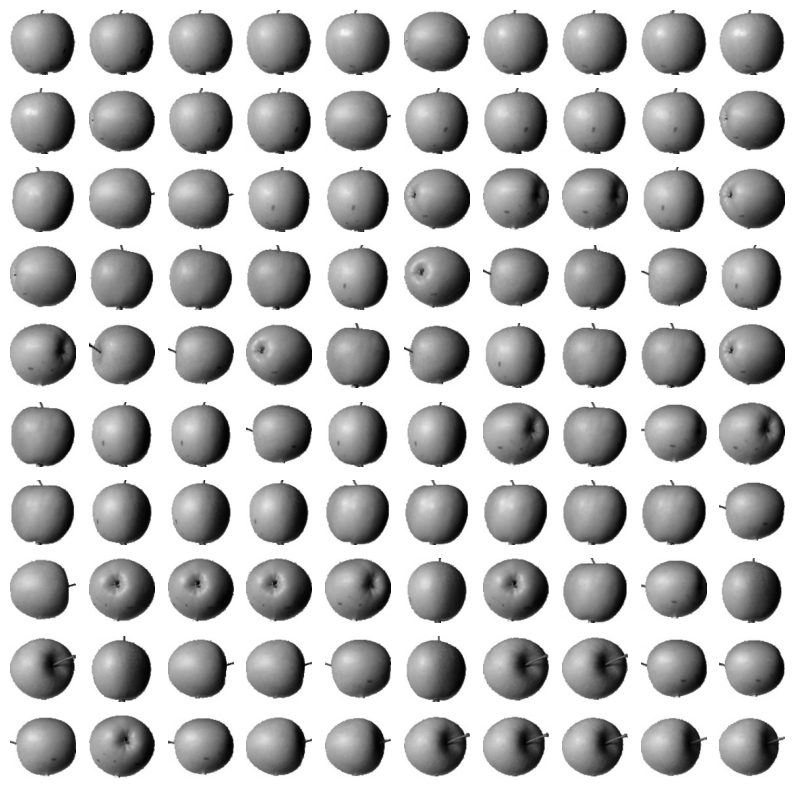

In [ ]:
apple_index = np.argsort(abs_mean[:100]) # 절댓값 오차가 가장 작은 상위 100개
apple_index = apple_index.reshape(10, 10)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r') # 10x10의 서브 그래프를 만들기 위한 용도
        ax[i, j].axis('off') # 각 서브플롯마다 격자 없애기용
plt.show()